# SVD

In [2]:
import pandas as pd

In [3]:
%pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [10]:
df = pd.read_csv('./REC_Collaborative_Facility.csv')

In [11]:
df.head()

,item,user,rating
0,252494,99709,1
1,252494,99706,1
2,252494,99709,1
3,252494,99709,1
4,252494,84401,2


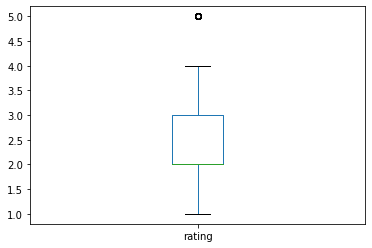

In [12]:
df.rating.plot.box()

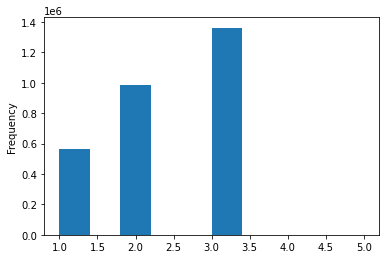

In [14]:
df.rating.plot.hist()

In [15]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader()
data = Dataset.load_from_df(df, reader)

algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7075  0.7074  0.7072  0.7073  0.0002  
MAE (testset)     0.6002  0.6001  0.6003  0.6002  0.0001  
Fit time          329.68  364.09  304.85  332.87  24.29   
Test time         34.46   36.37   30.81   33.88   2.31    


{'test_rmse': array([0.70752869, 0.70735622, 0.70715863]),
 'test_mae': array([0.60019722, 0.60009497, 0.60028806]),
 'fit_time': (329.68142652511597, 364.090580701828, 304.8525490760803),
 'test_time': (34.46441602706909, 36.37002491950989, 30.811031341552734)}

In [16]:
from surprise.prediction_algorithms.predictions import Prediction

uid = str(20901)
iid = str(232507)

algo.predict(uid, iid)

Prediction(uid='20901', iid='232507', r_ui=None, est=2.273820642754976, details={'was_impossible': False})

In [17]:
algo.predict(uid, iid).est

2.273820642754976